In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

In [2]:
# Import data from the colvar files
data_hills0 = plumed.read_as_pandas("hills/HILLS.0")
data_hills1 = plumed.read_as_pandas("hills/HILLS.1")
data_hills2 = plumed.read_as_pandas("hills/HILLS.2")
data_hills3 = plumed.read_as_pandas("hills/HILLS.3")
data_hills4 = plumed.read_as_pandas("hills/HILLS.4")
data_hills5 = plumed.read_as_pandas("hills/HILLS.5")
data_hills6 = plumed.read_as_pandas("hills/HILLS.6")
data_hills7 = plumed.read_as_pandas("hills/HILLS.7")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/1392044568.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills0 = plumed.read_as_pandas("hills/HILLS.0")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/1392044568.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills1 = plumed.read_as_pandas("hills/HILLS.1")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/1392044568.py:4: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills2 = plumed.read_as_pandas("hills/HILLS.2")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/1392044568.py:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills3 = plumed.read_as_pandas("hills/HILLS.3")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/1392044568.py:6: UserWarning: cannot load PLUMED instance, conversions will not be avail

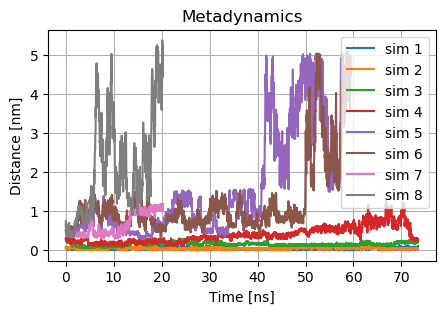

In [3]:
plt.rcParams["figure.figsize"] = (5, 3)
plt.plot(data_hills0["time"]*0.001, data_hills0["d1"], label="sim 1")
plt.plot(data_hills1["time"]*0.001, data_hills1["d1"], label="sim 2")
plt.plot(data_hills2["time"]*0.001, data_hills2["d1"], label="sim 3")
plt.plot(data_hills3["time"]*0.001, data_hills3["d1"], label="sim 4")
plt.plot(data_hills4["time"]*0.001, data_hills4["d1"], label="sim 5")
plt.plot(data_hills5["time"]*0.001, data_hills5["d1"], label="sim 6")
plt.plot(data_hills6["time"]*0.001, data_hills6["d1"], label="sim 7")
plt.plot(data_hills7["time"]*0.001, data_hills7["d1"], label="sim 8")
plt.grid()
plt.title("Metadynamics")
plt.ylabel("Distance [nm]")
plt.xlabel("Time [ns]")
plt.legend(loc="best")

# Reconstruct the free energy profile

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/348795574.py:4: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("hills/fes.dat")


Text(0, 0.5, 'Free energy [kJ/mol]')

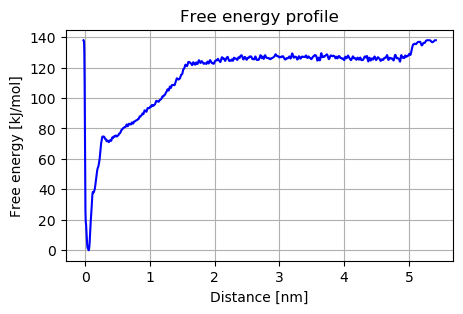

In [5]:
# cat HILLS.* >> all_HILLS
# plumed sum_hills --hills all_HILLS --mintozero

fes = plumed.read_as_pandas("hills/fes.dat")
plt.plot(fes["d1"], fes["file.free"], 'b')
plt.grid()
plt.title("Free energy profile")
plt.xlabel("Distance [nm]")
plt.ylabel("Free energy [kJ/mol]")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/2821624696.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("hills/fes.dat")


Text(0, 0.5, 'Free energy [kJ/mol]')

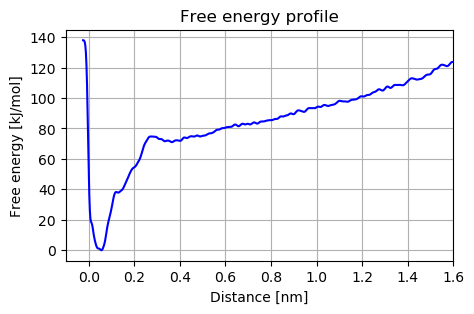

In [6]:
fes = plumed.read_as_pandas("hills/fes.dat")
plt.plot(fes["d1"], fes["file.free"], 'b')
plt.grid()
plt.xlim([-0.1, 1.6])
plt.title("Free energy profile")
plt.xlabel("Distance [nm]")
plt.ylabel("Free energy [kJ/mol]")

# FE as a function of time
I put the `all_HILLS` file in the proper order so that plumed can analyze the chuncks correctly time after time (as Cyndi Lauper). 

In [9]:
# Define a function to extract the time from a line
def extract_time(line):
    return int(line.split()[0])

# Read the file and extract lines excluding those starting with '#'
with open("hills/all_HILLS", "r") as file:
    lines = [line.rstrip("\n") for line in file if not line.startswith("#")]

# Sort the lines based on the extracted time
sorted_lines = sorted(lines, key=extract_time)

# Write the sorted lines to a new file
with open("hills/all_HILLS_SORTED", "w") as file:
    for line in sorted_lines:
        file.write(line + "\n")

print("File has been sorted and saved as hills/SAMPLE_SORTED.")

# Only remember to put 
#! FIELDS time d1 sigma_d1 height biasf clock
#! SET multivariate false
#! SET kerneltype stretched-gaussian
# at the beginning of the file, otherwise plumed will not read it


File has been sorted and saved as hills/SAMPLE_SORTED.


$$ \sum \text{Number of simulations}\times \frac{\text{Simulated time [ps]}}{ \text{Pace of deposition [ps]}}=8\times\frac{20300}{20}+6\times\frac{59400-20300}{20}+4\times\frac{73460-59400}{20}$$

In [53]:
def get_nanoseconds(t1, t2, t3, stride):
    chunk_1 = t1
    chunk_2 = t2 - t1
    chunk_3 = t3 - t2
    pace = 20 
    kernel_1 = 8*chunk_1/pace
    kernel_2 = 6*chunk_2/pace
    kernel_3 = 4*chunk_2/pace
    kernels = kernel_1 + kernel_2 + kernel_3
    n_fes_1 = math.floor(kernel_1/stride)
    print("n_fes_1", n_fes_1)
    n_fes_2 = math.floor(kernel_2/stride)
    print("n_fes_2", n_fes_2)
    n_fes_3 = math.floor(kernel_3/stride)
    print("n_fes_3", n_fes_3)


    ns = np.zeros(n_fes_1 + n_fes_2 + n_fes_3) # array containing the simulated nanoseconds 
    for i in range(n_fes_1): 
        ns[i] = round(stride/1000 * i * pace/8, 1)

    for i in range(1, n_fes_2): 
        ns[i + n_fes_1 - 1] = round(ns[n_fes_1 - 1] + stride/1000 * i * pace/6, 1)

    for i in range(1, n_fes_3 + 1): 
        ns[i + n_fes_1 + n_fes_2 - 2] = round(ns[n_fes_1 + n_fes_2 - 2] + stride/1000 * i * pace/4, 1)

    ns[n_fes_1 + n_fes_2 + n_fes_3 - 1] = round(t3/1000)

    return ns

In [54]:
nanos = []
nanos = get_nanoseconds(20300, 59400, 73460, 2000)

n_fes_1 4
n_fes_2 5
n_fes_3 3


In [55]:
len(nanos)

12

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/316883907.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("hills/FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/316883907.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("hills/FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/316883907.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("hills/FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/316883907.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("hills/FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1531/316883907.py:6: UserWarning: cannot load PLUMED instance, conversion

Text(0, 0.5, 'Free energies [kJ/mol]')

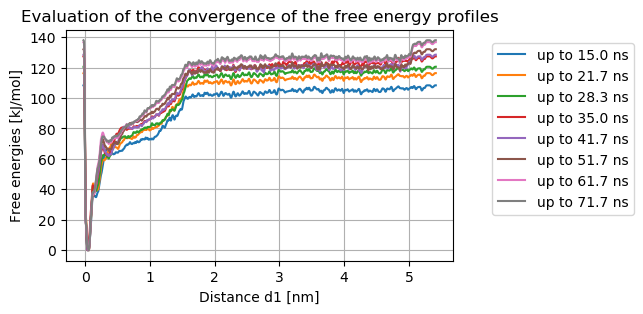

In [63]:
# Milestones
# 20300 (6, 7) - 59400 (4, 5)

for i in range(4, 12):   
    # import fes file into pandas dataset
    data=plumed.read_as_pandas("hills/FES/fes_"+str(i)+".dat")
    plt.plot(data["d1"],data["file.free"], label="up to "+str(nanos[i-1])+" ns")

plt.grid()
plt.title("Evaluation of the convergence of the free energy profiles")
plt.legend(loc=(1.1, 0.2))
plt.xlabel("Distance d1 [nm]")
plt.ylabel("Free energies [kJ/mol]")

In [61]:
import os
import matplotlib.animation as animation

# Function to read data from .dat files
def read_dat_file(filename):
    with open(filename, 'r') as file:
        data = np.loadtxt(file)
    return data

# Directory containing .dat files
data_dir = ""

# List all .dat files in the directory
dat_files = [f for f in os.listdir(data_dir) if f.endswith('.dat')]

# Sorting the files to ensure correct ordering
dat_files.sort()

# Create figure and axis
fig, ax = plt.subplots()

# Function to update the plot for each frame of the animation
def update(frame):
    ax.clear()
    data = read_dat_file(os.path.join(data_dir, dat_files[frame]))
    ax.plot(data[:, 0], data[:, 1])
    ax.set_title(dat_files[frame])
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(dat_files), interval=200)

# Save the animation as a video
output_file = "output_video.mp4"
ani.save(output_file, writer='ffmpeg', fps=5)  # Adjust fps as needed

plt.show()


KeyboardInterrupt: 